# YouTube Data Analysis 

In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import collections
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

In [234]:
data=pd.read_csv('top-5000-youtube-channels.csv')

### Exploratory Data Analysis

In [235]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


### 1. Display All Rows Except the Last 5 rows Using Head Method 

In [236]:
data.head(-5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4990,"4,991st",B+,Ho Ngoc Ha's Official Channel,208,--,127185704
4991,"4,992nd",B+,Toys to Learn Colors,11,663114,141933264
4992,"4,993rd",B+,КАZКА,25,131766,74304638
4993,"4,994th",B+,United CUBE (CUBE Entertainment…,1055,1586835,371299166


### 2. Display All Rows Except the First 5 Rows Using Tail Method 

In [237]:
data.tail(-5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307
...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [238]:
data.shape

(5000, 6)

In [239]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 5000
Number of Columns 6


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


### 5. Get Overall Statistics About The Dataframe

In [241]:
pd.options.display.float_format = '{:.2f}'.format

In [242]:
data.describe()

,Video views
count,5000.00
mean,1071449400.15
std,2003843972.12
min,75.00
25%,186232945.75
50%,482054780.00
75%,1124367826.75
max,47548839843.00


### 6. Data Cleaning  (Replace '--'  to NaN)

In [243]:
import numpy as np

In [244]:
data=data.replace('--',np.nan,regex=True)

In [245]:
data.head(20)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307


### 7. Check Null Values In The Dataset

In [246]:
data.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [247]:
per_missing = data.isnull().sum() * 100 / len(data)

In [248]:
per_missing

Rank            0.00
Grade           0.00
Channel name    0.00
Video Uploads   0.12
Subscribers     7.74
Video views     0.00
dtype: float64

<Axes: >

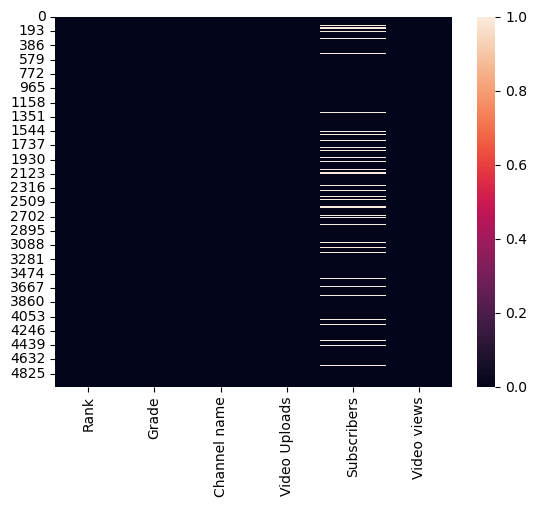

In [249]:
sns.heatmap(data.isnull())

In [250]:
data.dropna(axis=0,inplace=True)

<Axes: >

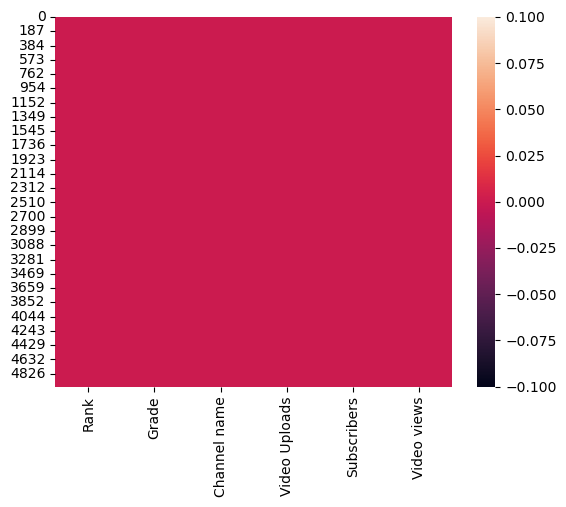

In [251]:
sns.heatmap(data.isnull())

### 8. Data Cleaning [ Rank Column ] 

In [252]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [253]:
data.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


In [254]:
data.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [255]:
data['Rank']=data['Rank'].str[0:-2]

In [256]:
data['Rank']=data['Rank'].str.replace(',','').astype('int')

In [257]:
data.dtypes

Rank              int32
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [258]:
data.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,4996,B+,Uras Benlioğlu,706,2072942,441202795
4996,4997,B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,4998,B+,Mastersaint,110,3265735,311758426
4998,4999,B+,Bruce McIntosh,3475,32990,14563764
4999,5000,B+,SehatAQUA,254,21172,73312511


In [259]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,Zee TV,82757,18752951,20869786591
1,2,A++,T-Series,12661,61196302,47548839843
2,3,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,A++,SET India,27323,31180559,22675948293
4,5,A++,WWE,36756,32852346,26273668433


### 9. Data Cleaning [ Video Uploads & Subscribers ]

In [260]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,Zee TV,82757,18752951,20869786591
1,2,A++,T-Series,12661,61196302,47548839843
2,3,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,A++,SET India,27323,31180559,22675948293
4,5,A++,WWE,36756,32852346,26273668433


In [261]:
data.dtypes

Rank              int32
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [262]:
data['Video Uploads'] =data['Video Uploads'].astype('int')

In [263]:
data['Subscribers'] = data['Subscribers'].astype('int')

In [264]:
data.dtypes

Rank              int32
Grade            object
Channel name     object
Video Uploads     int32
Subscribers       int32
Video views       int64
dtype: object

### 10. Data Cleaning [ Grade Column ]

In [265]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,Zee TV,82757,18752951,20869786591
1,2,A++,T-Series,12661,61196302,47548839843
2,3,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,A++,SET India,27323,31180559,22675948293
4,5,A++,WWE,36756,32852346,26273668433


In [266]:
data['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [267]:
#mapping
data['Grade']=data['Grade'].map({'A++ ':5,'A+ ':4,'A ':3,'A- ':2,'B+ ':1})

In [268]:
data.dtypes

Rank              int32
Grade             int64
Channel name     object
Video Uploads     int32
Subscribers       int32
Video views       int64
dtype: object

### 11. Find Average Views For Each Channel

In [269]:
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

In [270]:
data['Avg_views']=data['Video views']/data['Video Uploads']

In [271]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
0,1,5,Zee TV,82757,18752951,20869786591,252181.53
1,2,5,T-Series,12661,61196302,47548839843,3755535.89
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082,26255509.60
3,4,5,SET India,27323,31180559,22675948293,829921.62
4,5,5,WWE,36756,32852346,26273668433,714813.05


### 12. Find Out Top Five Channels With Maximum Number of Video Uploads

In [272]:
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'Avg_views'],
      dtype='object')

In [273]:
data.sort_values(by='Video Uploads',ascending=False).head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
3453,3454,1,AP Archive,422326,746325,548619569,1299.04
1149,1150,2,YTN NEWS,355996,820108,1640347646,4607.77
2223,2224,1,SBS Drama,335521,1418619,1565758044,4666.65
323,324,3,GMA News,269065,2599175,2786949164,10357.90
2956,2957,1,MLB,267649,1434206,1329206392,4966.23


### 13. Find Correlation Matrix

In [274]:
df = data.drop('Channel name', axis = 1)

In [275]:
df.corr()

,Rank,Grade,Video Uploads,Subscribers,Video views,Avg_views
Rank,1.00,-0.87,-0.07,-0.38,-0.40,-0.15
Grade,-0.87,1.00,0.09,0.43,0.48,0.16
Video Uploads,-0.07,0.09,1.00,0.01,0.09,-0.06
Subscribers,-0.38,0.43,0.01,1.00,0.79,0.29
Video views,-0.40,0.48,0.09,0.79,1.00,0.29
Avg_views,-0.15,0.16,-0.06,0.29,0.29,1.00


### 14.  Which Grade Has A Maximum Number of Video Uploads?

In [276]:
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'Avg_views'],
      dtype='object')

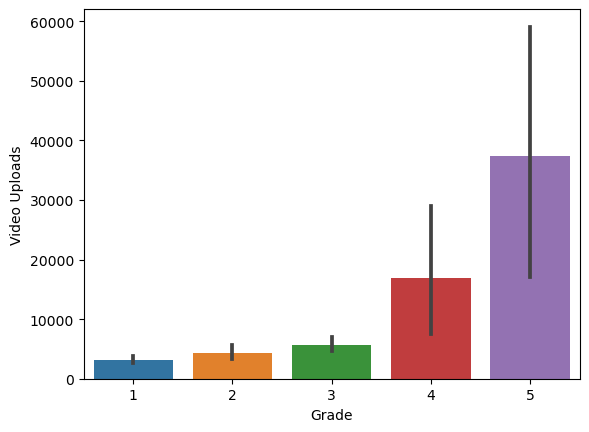

In [277]:
ax = sns.barplot(x='Grade',y='Video Uploads',data=data)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

### 15.Which Grade Has The Highest Average Views?

In [278]:
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'Avg_views'],
      dtype='object')

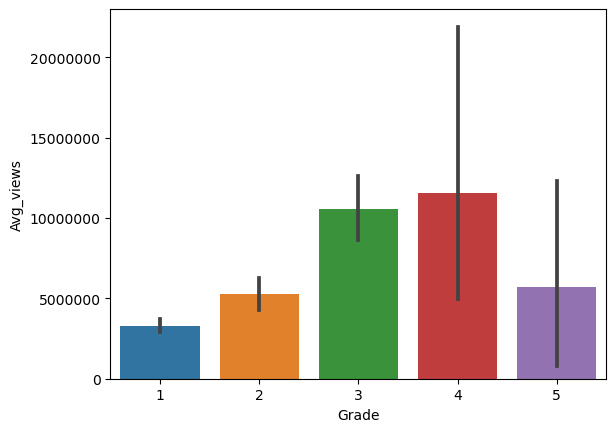

In [279]:
ax = sns.barplot(x='Grade',y='Avg_views',data=data) 
ax.ticklabel_format(style='plain', axis='y')
plt.show()

### 16.  Which Grade Has The Highest Number of Subscribers? 

In [280]:
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'Avg_views'],
      dtype='object')

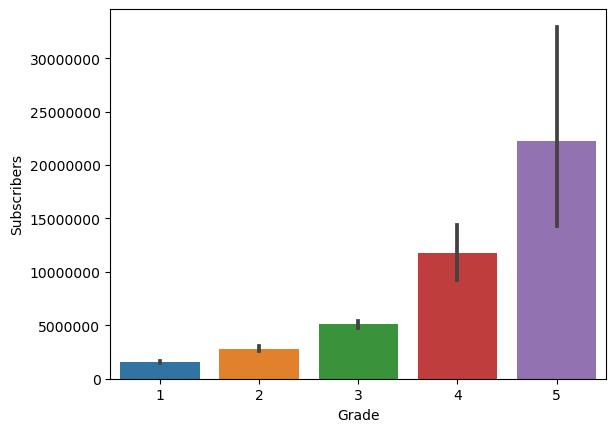

In [281]:
ax = sns.barplot(x='Grade',y='Subscribers',data=data) 
ax.ticklabel_format(style='plain', axis='y')
plt.show()

### 17. Which Grade Has The Highest Video Views? 

In [293]:
df1 = data.groupby('Grade')['Video views'].sum().sort_values(ascending = False)
df1 = pd.DataFrame(df1)
df1

,Video views
Grade,
3,2240681735353
1,1511210409992
2,1037405476053
4,246749670909
5,211990911928


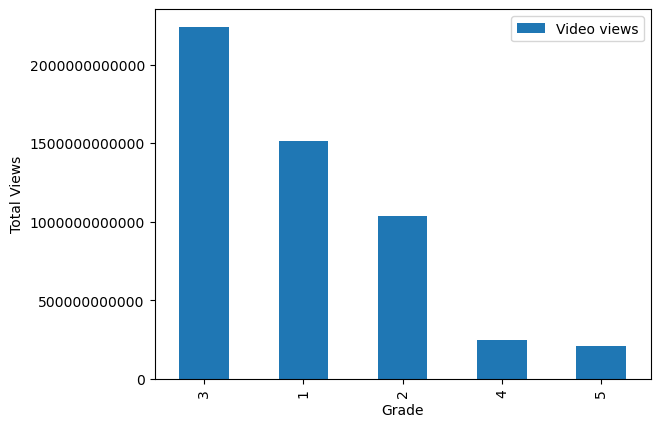

In [296]:
ax = df1.plot(kind = 'bar')
plt.ylabel('Total Views')
ax.ticklabel_format(style='plain', axis='y')
plt.show()